<img src = "https://miro.medium.com/max/4000/0*VbMjGBHMC6GnDKUp.png">

### **Detectron2: A PyTorch-based modular object detection library**

Detectron2 is a ground-up rewrite of Detectron that started with 
maskrcnn-benchmark
. The platform is now implemented in 
PyTorch
. With a new, more modular design, Detectron2 is flexible and extensible, and able to provide fast training on single or multiple GPU servers. Detectron2 includes high-quality implementations of state-of-the-art object detection algorithms, including 
DensePose
, 
panoptic feature pyramid networks
, and numerous variants of the pioneering 
Mask R-CNN
model family also developed by FAIR. Its extensible design makes it easy to implement cutting-edge research projects without having to fork the entire codebase.
[
See Detailed Video](https://youtu.be/egs0XN-xjA0/)

## **Installing Dependencies**

Make sure all these dependencies are installed before working on Detectron2



In [2]:
# install dependencies: 
!pip install pyyaml==5.1 pycocotools>=2.0.1 torch
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

  ERROR: Command errored out with exit status 1:
   command: 'D:\Anaconda\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Abid\\AppData\\Local\\Temp\\pip-install-q94m6hvz\\pycocotools_7bb83b05487740e4a52069ec8a810529\\setup.py'"'"'; __file__='"'"'C:\\Users\\Abid\\AppData\\Local\\Temp\\pip-install-q94m6hvz\\pycocotools_7bb83b05487740e4a52069ec8a810529\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Abid\AppData\Local\Temp\pip-wheel-q4i23j5_'
       cwd: C:\Users\Abid\AppData\Local\Temp\pip-install-q94m6hvz\pycocotools_7bb83b05487740e4a52069ec8a810529\
  Complete output (16 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.8
  creating build\lib.win-amd64-3.8\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-3.8\pycocotools


ModuleNotFoundError: No module named 'torchvision'

## **Installing Detectron2**

In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.6)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
assert torch.__version__.startswith("1.6")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

## **Import Libraries**

In [ ]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
import matplotlib.pyplot as plt
import cv2

## **Importing references of our images**

In [5]:
import os
im = []

#Iterating over each filename in our directory. It can be millions as well
IM_DIR = "/content/drive/My Drive/images"
for filename in os.listdir(f'{IM_DIR}'):
        # Load all images
        im.append(f'{IM_DIR}/{filename}')

In [6]:
#Let's check it
im

['/content/drive/My Drive/images/d01.jpg',
 '/content/drive/My Drive/images/d02.jpg',
 '/content/drive/My Drive/images/d03.jpg',
 '/content/drive/My Drive/images/d04.jpg',
 '/content/drive/My Drive/images/d05.jpg']

## **Configuring a PreTrained Model for Object Detection**

In [8]:
#Let's configure our model for object detection 
cfg = get_cfg()

#Here we are using pretrained Faster RCNN Model. (Region for Convolutional Network) - New 2015
cfg.merge_from_file(modael_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml")

## **Making Predictions**

In [15]:
# Create predictor
predictor = DefaultPredictor(cfg)

#Reading Images from URL
images = [cv2.imread(i) for i in im]

# Make prediction
outputs = [predictor(i) for i in images]

## **Let's visualize our predicted results**

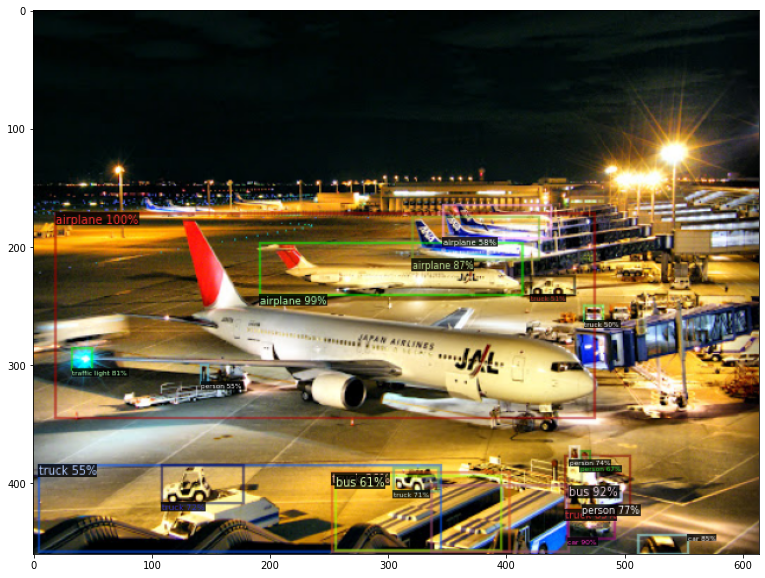

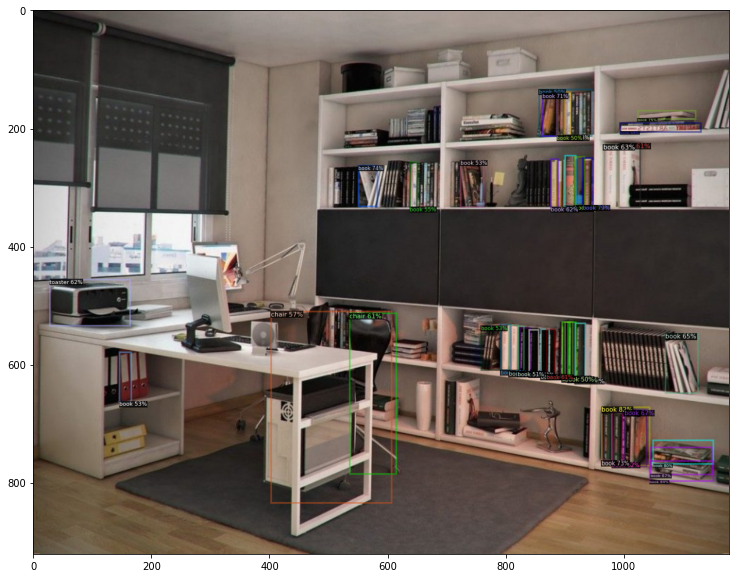

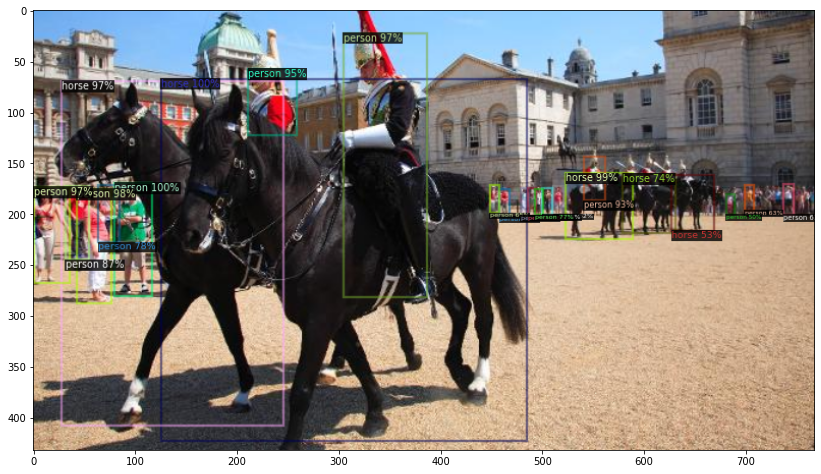

In [16]:
#Iterating over each image with embedded predictions
for j in range(5):
  v = Visualizer(images[j][:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  v = v.draw_instance_predictions(outputs[j]["instances"].to("cpu"))
  plt.figure(figsize = (14, 10))
  plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

## **Configuring a PreTrained Model for Image Segmentation**

In [17]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

## **Making Predictions for Image Segmentation**

In [18]:
# Create predictor
predictor = DefaultPredictor(cfg)

#Reading Images from URL
images = [cv2.imread(i) for i in im]

# Make prediction
outputs = [predictor(i) for i in images]

## **Let's visualize our predicted results**

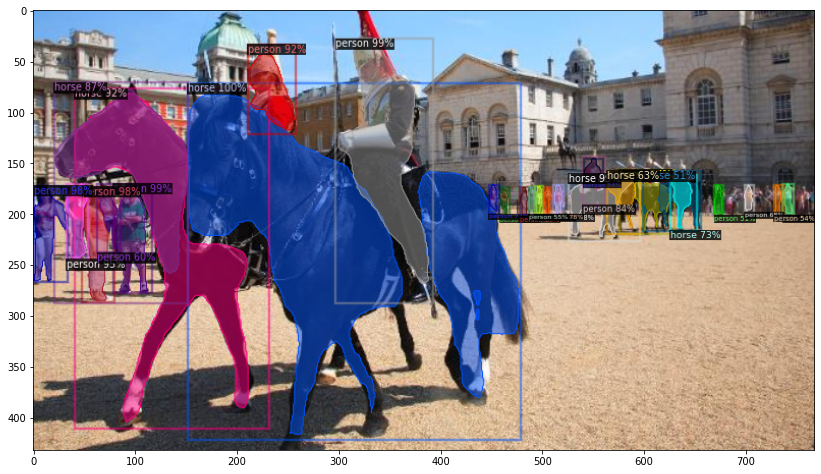

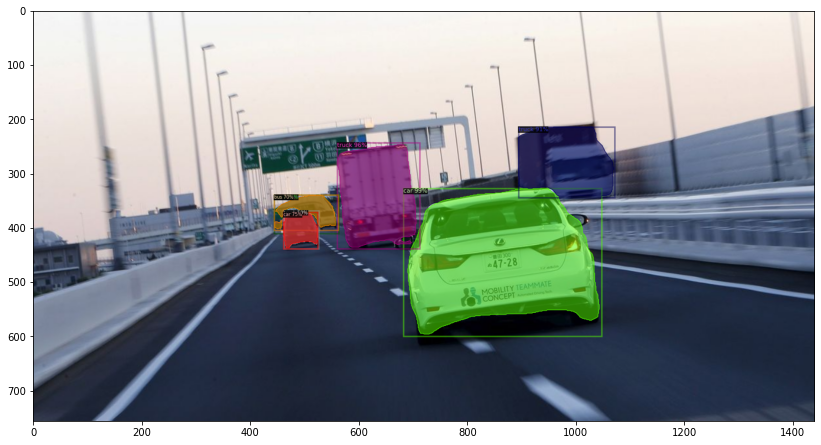

In [19]:
#Iterating over each image with embedded predictions
for j in range(5):
  v = Visualizer(images[j][:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  v = v.draw_instance_predictions(outputs[j]["instances"].to("cpu"))
  plt.figure(figsize = (14, 10))
  plt.imshow(cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB))

## **Your task due date: Nov 12**

**Build Post Estimation on Video**